In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import optimizers
from keras.layers import LeakyReLU
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
project_path = '/content/drive/My Drive/CNN/Data/'

In [ ]:
dataset_Label = project_path + 'Labels.csv'

In [ ]:
data_label = pd.read_csv(dataset_Label)

In [ ]:
data_label.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [ ]:
dataset_Images = project_path + 'images.npy'

In [ ]:
data_images = np.load(dataset_Images)

### Data Shape

In [ ]:
data_images.shape

(4750, 128, 128, 3)

In [ ]:
data_label.shape

(4750, 1)

In [ ]:
data_label.iloc[0]

Label    Small-flowered Cranesbill
Name: 0, dtype: object

### Data label & Image Visualization

Label    Small-flowered Cranesbill
Name: 0, dtype: object


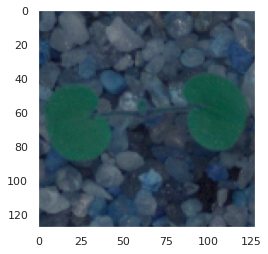

In [ ]:
print(data_label.iloc[0])
plt.grid(b=None);
plt.imshow(data_images[0]);

Label    Small-flowered Cranesbill
Name: 20, dtype: object


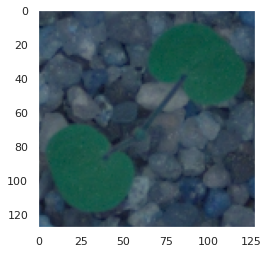

In [ ]:
print(data_label.iloc[20])
plt.grid(b=None);
plt.imshow(data_images[20]);

Label    Scentless Mayweed
Name: 3156, dtype: object


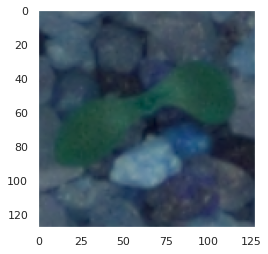

In [ ]:
print(data_label.iloc[3156])
plt.grid(b=None);
plt.imshow(data_images[3156]);

Label    Charlock
Name: 2232, dtype: object


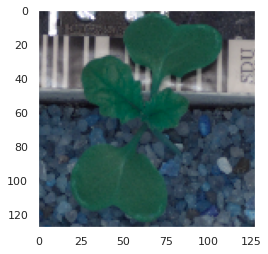

In [ ]:
print(data_label.iloc[2232])
plt.grid(b=None);
plt.imshow(data_images[2232]);

Label    Black-grass
Name: 4078, dtype: object


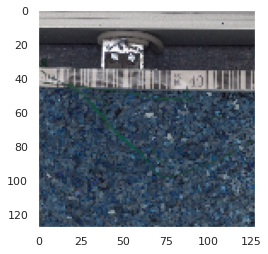

In [ ]:
print(data_label.iloc[4078])
plt.grid(b=None);
plt.imshow(data_images[4078]);

### Data Pre-processing

#### a). Normalization

In [ ]:
data_images = data_images.astype('float32')

In [ ]:
data_images /= 255

#### b). Gaussian Blurring

In [ ]:
print(len(data_images)) # Check the number of rows in the dataset.
print(data_images.shape)

4750
(4750, 128, 128, 3)


In [ ]:
# Now we create an empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
new_x = np.empty((4750, 128, 128, 3))

In [ ]:
# Now we apply the gaussian blur to each 128 x 128 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(data_images):
  new_x[idx] = cv2.GaussianBlur(img, (5, 5), 0)

#### c.) Visualization after pre-processing

Blurred image is


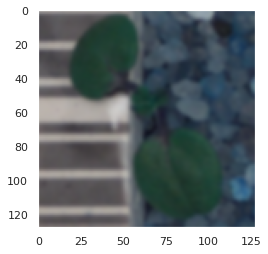

In [ ]:
print('Blurred image is')
plt.grid(b=None);
plt.imshow(new_x[2500]);

Original image is


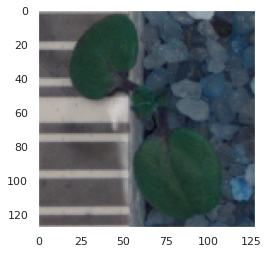

In [ ]:
print('Original image is')
plt.grid(b=None);
plt.imshow(data_images[2500]);

### 3. Data Compatibility

#### a). Converting labels to one-hot-vectors

In [ ]:
y = data_label

In [ ]:
y.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


#### Let's see what are unique labels in our data set

In [ ]:
y['Label'].value_counts().sort_values(ascending=False)

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: Label, dtype: int64

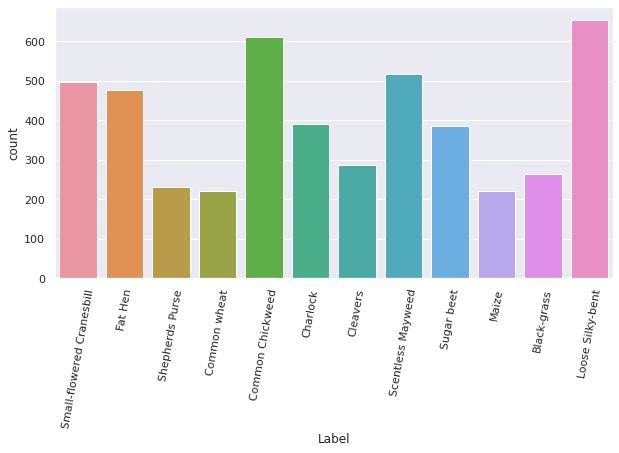

In [ ]:
sns.set(color_codes=True)
plt.figure(figsize=(10,5));
b = sns.countplot(y['Label']);
b.set_xticklabels(b.get_xticklabels(),rotation=80);

#### We can see that "Loose Silky-bent", "Common Chickweed" & "Scentless Mayweed" are top 3 labels in our data set.
#### Let's convert our labels to one-hot-vectors

In [ ]:
# Converting labels to one hot vectors.
enc = LabelBinarizer()
y = enc.fit_transform(y)

#### b). Printing y[0]

In [ ]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
y[2000]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
np.unique(y)

array([0, 1])

#### c). Splitting dataset into train, test & validation set

In [ ]:
X_train, X_remain, y_train, y_remain = train_test_split(new_x, y, test_size=0.30, random_state=1)

In [ ]:
X_test, X_validate, y_test, y_validate = train_test_split(X_remain, y_remain, test_size=0.50, random_state=1)

#### d). Checking shape of data

#### Let's check shape of data and analyze if our dataset is ready for model creation

In [ ]:
print('X_train shape is', X_train.shape)
print('X_remain shape is', X_remain.shape)
print('y_train shape is', y_train.shape)
print('y_remain shape is', y_remain.shape)
print('X_test shape is', X_test.shape)
print('y_test shape is', y_test.shape)
print('X_validate shape is', X_validate.shape)
print('y_validate shape is', y_validate.shape)

X_train shape is (3325, 128, 128, 3)
X_remain shape is (1425, 128, 128, 3)
y_train shape is (3325, 12)
y_remain shape is (1425, 12)
X_test shape is (712, 128, 128, 3)
y_test shape is (712, 12)
X_validate shape is (713, 128, 128, 3)
y_validate shape is (713, 12)


In [ ]:
X_train[90, :, :, :].shape

(128, 128, 3)

In [ ]:
X_validate[700, :, :, :].shape

(128, 128, 3)

In [ ]:
X_test[655, :, :, :].shape

(128, 128, 3)

#### We can see that our data set is already in compatible shape for Keras modeling. We don't need to reshape it.

#### Let's proceed to CNN model creation

### 4. Building CNN

In [ ]:
#batch_size = 20
#num_classes = 12
#epochs = 100
#num_predictions = 24

In [ ]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', batch_input_shape = (batch_size,128, 128, 3)))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.4))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation = "softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)       

In [ ]:
#opt = Adam(lr=0.001)

optimizer = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# initiate Adam optimizer
"""opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)"""

'opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)'

In [ ]:
# Let's train the model using Adam optimizer
"""model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])"""

"model.compile(loss='categorical_crossentropy',\n              optimizer=opt,\n              metrics=['accuracy'])"

In [ ]:
# Network structure is summarized which confirms our design was implemented correctly.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)       

### 5. Fit & Evaluate Model and Confusion Matrix

In [ ]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=50,
                    validation_data=(X_validate, y_validate),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

Epoch 1/50
104/104 [==============================] - ETA: 0s - loss: 2.3579 - accuracy: 0.1907
Epoch 00001: val_loss improved from inf to 2.21446, saving model to cifar_cnn_checkpoint_01_loss2.2145.h5
104/104 [==============================] - 6s 61ms/step - loss: 2.3579 - accuracy: 0.1907 - val_loss: 2.2145 - val_accuracy: 0.2623
Epoch 2/50
104/104 [==============================] - ETA: 0s - loss: 2.1163 - accuracy: 0.2683
Epoch 00002: val_loss improved from 2.21446 to 2.05612, saving model to cifar_cnn_checkpoint_02_loss2.0561.h5
104/104 [==============================] - 6s 59ms/step - loss: 2.1163 - accuracy: 0.2683 - val_loss: 2.0561 - val_accuracy: 0.3226
Epoch 3/50
104/104 [==============================] - ETA: 0s - loss: 2.0065 - accuracy: 0.2896
Epoch 00003: val_loss improved from 2.05612 to 2.01774, saving model to cifar_cnn_checkpoint_03_loss2.0177.h5
104/104 [==============================] - 6s 59ms/step - loss: 2.0065 - accuracy: 0.2896 - val_loss: 2.0177 - val_accurac

In [ ]:
score = model.evaluate(X_validate, y_validate, verbose=0, batch_size = 38)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.398152619600296
Validation accuracy: 0.8555399775505066


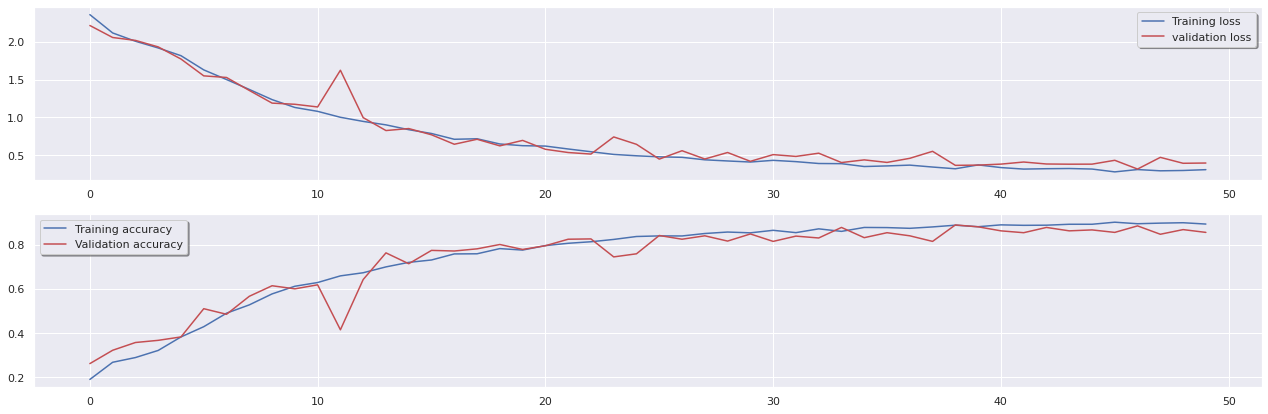

In [ ]:
# plot training & validation history
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Confusion Matrix

In [ ]:
data_label.shape

(4750, 1)

In [ ]:
data_label

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [ ]:
classes = np.array(data_label)

In [ ]:
classes

array([['Small-flowered Cranesbill'],
       ['Small-flowered Cranesbill'],
       ['Small-flowered Cranesbill'],
       ...,
       ['Loose Silky-bent'],
       ['Loose Silky-bent'],
       ['Loose Silky-bent']], dtype=object)

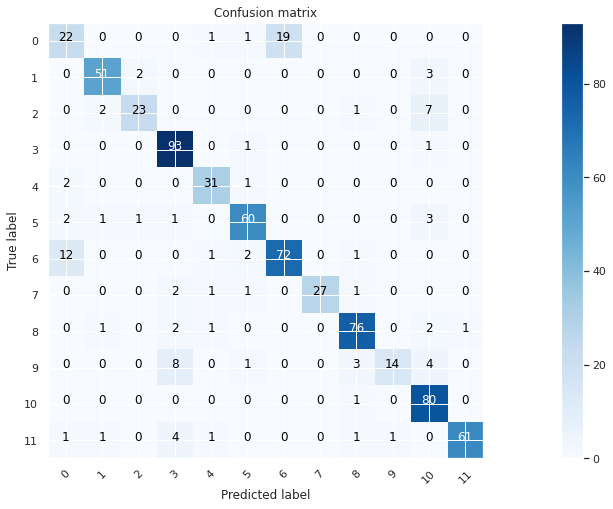

In [124]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(12))

### 6. Predictions

In [125]:
Predicted_classes = model.predict_classes(X_test)

In [126]:
set(Predicted_classes)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

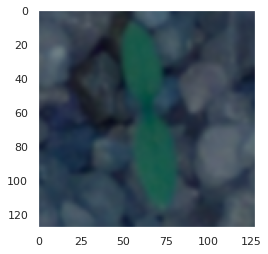

In [127]:
plt.grid(b=None);
plt.imshow(X_test[2]);

In [128]:
y_test[2]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [140]:
print("Predicted class: {}".format(enc.classes_[Predicted_classes[2]]))
print("Actual class: {}".format(enc.classes_[np.argmax(y_test[2])]))

Predicted class: Common Chickweed
Actual class: Common Chickweed


#### X_test[2] class is predicted correctly

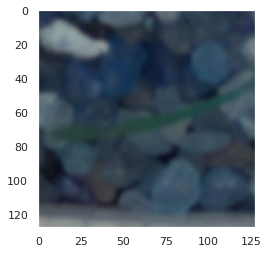

In [141]:
plt.grid(b=None);
plt.imshow(X_test[3]);

In [142]:
print("Predicted class: {}".format(enc.classes_[Predicted_classes[3]]))
print("Actual class: {}".format(enc.classes_[np.argmax(y_test[3])]))

Predicted class: Loose Silky-bent
Actual class: Black-grass


#### X_test[3] class is not predicted correctly

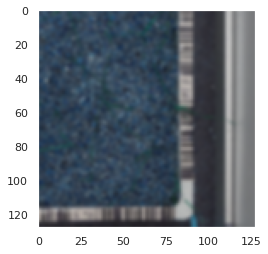

In [143]:
plt.grid(b=None);
plt.imshow(X_test[33]);

In [144]:
print("Predicted class: {}".format(enc.classes_[Predicted_classes[33]]))
print("Actual class: {}".format(enc.classes_[np.argmax(y_test[33])]))

Predicted class: Black-grass
Actual class: Loose Silky-bent


#### X_test[33] class is not predicted correctly

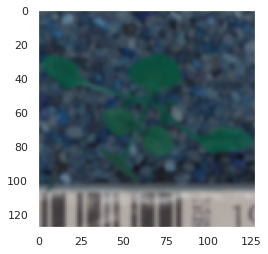

In [145]:
plt.grid(b=None);
plt.imshow(X_test[36]);

In [146]:
print("Predicted class: {}".format(enc.classes_[Predicted_classes[36]]))
print("Actual class: {}".format(enc.classes_[np.argmax(y_test[36])]))

Predicted class: Common Chickweed
Actual class: Common Chickweed


#### X_test[36] class is predicted correctly

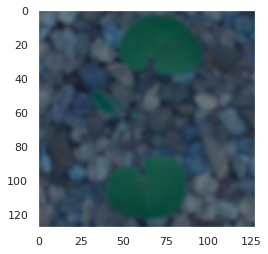

In [147]:
plt.grid(b=None);
plt.imshow(X_test[59]);

In [148]:
print("Predicted class: {}".format(enc.classes_[Predicted_classes[59]]))
print("Actual class: {}".format(enc.classes_[np.argmax(y_test[59])]))

Predicted class: Small-flowered Cranesbill
Actual class: Small-flowered Cranesbill


#### X_test[59] class is predicted correctly

### Observations:

#### Model accuracy was first tried with Adam Optimizer and it was around 82%

#### Then Model was further tuned on RMSProp Optimizer and Model Accuracy improved to 85.5%

#### Training Loss is Compared with Validation Loss

#### Training Accuracy is Compared with Validation Accuracy

#### Confusion Matrix showing most of the set of classes are predicted correctly with significant accuracies

#### Model is predicted on test data set and visualized for few images